In [23]:
import os
import numpy as np
import matplotlib.pyplot as plt
from BFEE2.commonTools import commonSlots, fileParser, ploter

In [24]:
def readPMF(filePath):
    """read a 1D PMF file

    Args:
        filePath (str): the path of the PMF file

    Returns:
        np.array (float, 2*N): ((x0,x1,x2, ...), (y0, y1, y2, ...))
    """

    data = np.loadtxt(filePath)
    x = data[:,0]
    y = data[:,1]

    return np.array((x, y))

In [25]:
# Read PMF files 
steps = ['RMSDBound', 'EulerTheta', 'EulerPhi', 'EulerPsi', 'PolarTheta', 'PolarPhi', 'r', 'RMSDUnbound']
pmf_paths = []
pmfs = []
for i in range(1, 9):
    pmf_path = f'../BFEE_NAMD/00{i}_{steps[i-1]}/output/abf_1.abf1.czar.pmf'
    pmf_paths.append(pmf_path)
    pmfs.append(readPMF(pmf_path))

   


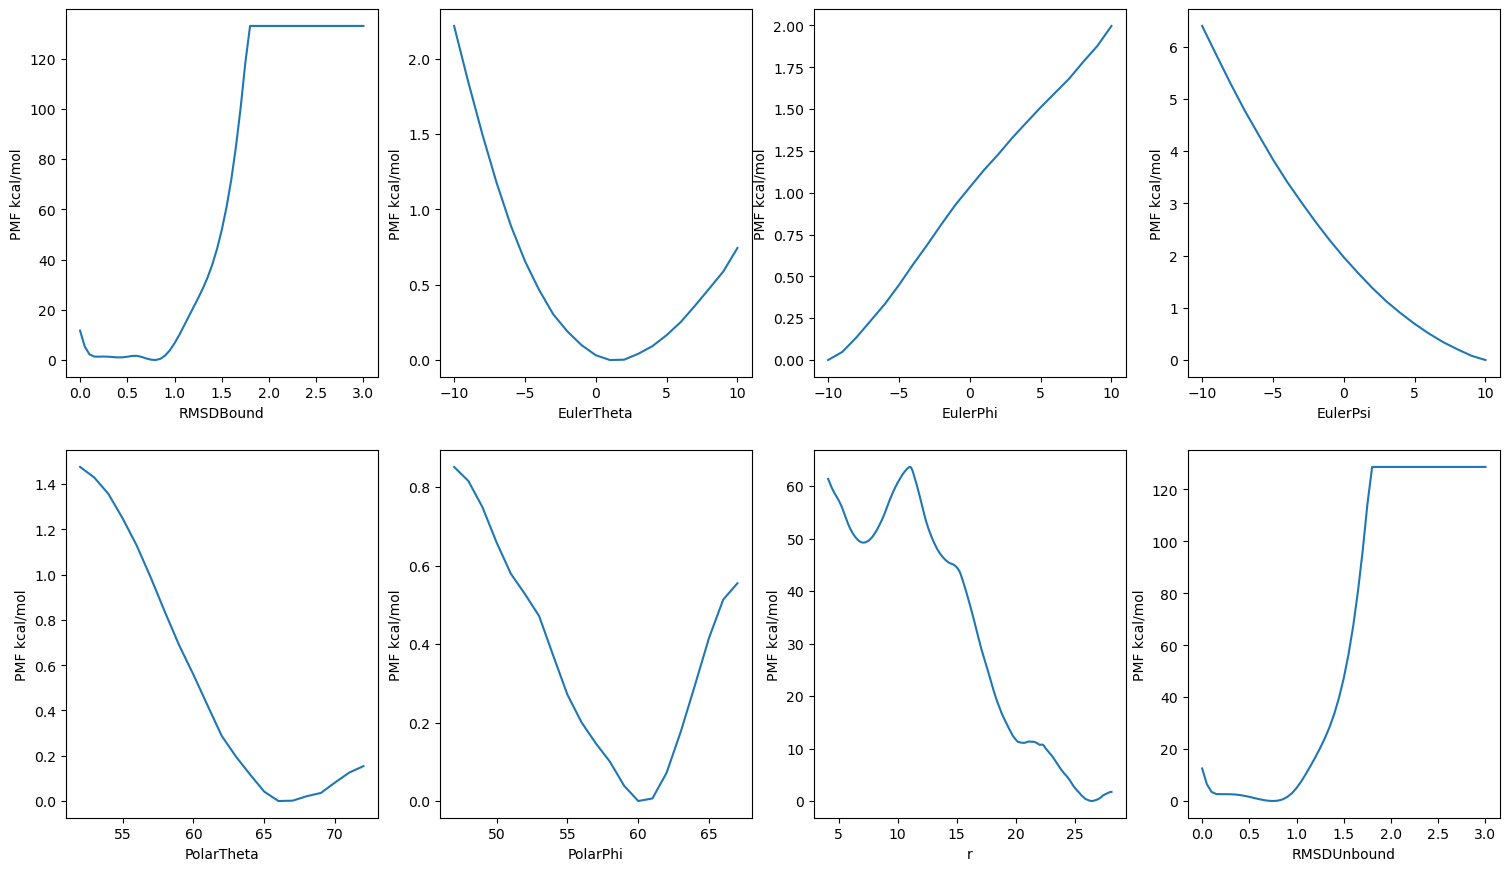

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(18.5, 10.5)
axes = axes.flatten()
for idx, pmf in enumerate(pmfs):
    axes[idx].plot(*pmf)
    axes[idx].set_xlabel(steps[idx])
    axes[idx].set_ylabel('PMF kcal/mol')
    
plt.savefig('figures/pmfs.png')

In [27]:
# Read PMF files paper 
# steps = ['RMSDBound', 'EulerTheta', 'EulerPhi', 'EulerPsi', 'PolarTheta', 'PolarPhi', 'r', 'RMSDUnbound']
# pmf_paths = []
# pmfs = []
# for i in range(1, 9):
#     pmf_path =  f'../outputs_paper/00{i}_{steps[i-1]}.czar.pmf'
#     pmf_paths.append(pmf_path)
#     pmfs.append(readPMF(pmf_path))
    
# fig, axes = plt.subplots(nrows=2, ncols=4)
# fig.set_size_inches(18.5, 10.5)
# axes = axes.flatten()
# for idx, pmf in enumerate(pmfs):
#     axes[idx].plot(*pmf)
#     axes[idx].set_xlabel(steps[idx])
#     axes[idx].set_ylabel('PMF kcal/mol')
    
# plt.savefig('figures/pmfs_paper.png')

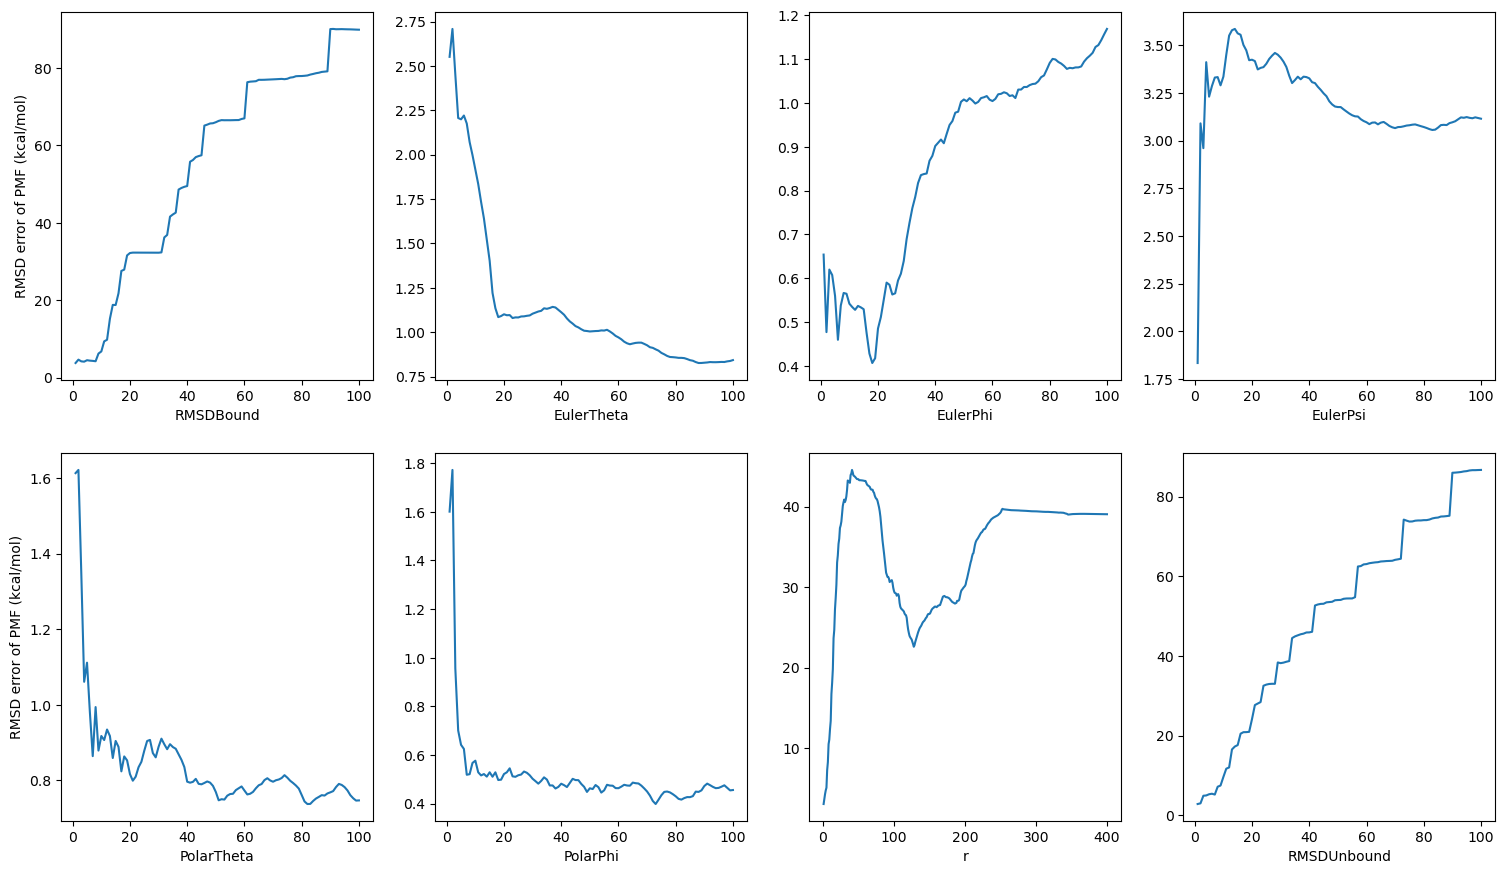

In [38]:
steps = ['RMSDBound', 'EulerTheta', 'EulerPhi', 'EulerPsi', 'PolarTheta', 'PolarPhi', 'r', 'RMSDUnbound']
hist_pmf_paths = []
hist_pmfs = []
for i in range(1, 9):
    pmf_path =   f'../BFEE_NAMD/00{i}_{steps[i-1]}/output/abf_1.abf1.hist.czar.pmf'
    hist_pmf_paths.append(pmf_path)
    hist_pmfs.append(ploter.parseHistFile(pmf_path))

fig, axes = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(18.5, 10.5)
axes = axes.flatten()

for idx, rmsds in enumerate(hist_pmfs):
    axes[idx].plot(range(1, len(rmsds) + 1), rmsds)
    axes[idx].set_xlabel(steps[idx])
    if idx == 0 or idx==4:
        axes[idx].set_ylabel('RMSD error of PMF (kcal/mol)')
plt.savefig('figures/rmsd_error.png')
